# Predicting Restaurant Food Cost 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Training Dataset

In [2]:
df = pd.read_excel('Food_Train.xlsx')
df

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


## Test Dataset

In [3]:
td = pd.read_excel('Food_Test.xlsx')
td

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


## Features Description:

        - TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

        - RESTAURANT_ID: A unique ID for each restaurant.

        - CUISINES: The variety of cuisines that the restaurant offers.

        - TIME: The open hours of the restaurant.

        - CITY: The city in which the restaurant is located.

        - LOCALITY: The locality of the restaurant.

        - RATING: The average rating of the restaurant by customers.

        - VOTES: The overall votes received by the restaurant.

        - COST: The average cost of a two-person meal.

## Let's Consider Training Dataset

In [4]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


### Observations:
        Features such as RESTAURANT_ID, VOTES are not required for 'COST' prediction, hence we can drop these columns.

In [5]:
df.drop(['RESTAURANT_ID','VOTES'],axis=1,inplace=True)

In [6]:
df.shape

(12690, 7)

In [7]:
df.columns

Index(['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'COST'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TITLE     12690 non-null  object
 1   CUISINES  12690 non-null  object
 2   TIME      12690 non-null  object
 3   CITY      12578 non-null  object
 4   LOCALITY  12592 non-null  object
 5   RATING    12688 non-null  object
 6   COST      12690 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 694.1+ KB


### Observations:
        - COST column is in 'int' Data-Type.
        - Rest of the columns are in 'object' Data-Type

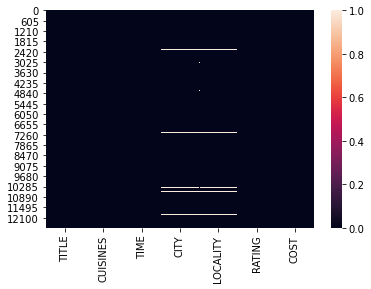

In [9]:
sns.heatmap(df.isnull())
plt.show()

In [10]:
df.isnull().sum()

TITLE         0
CUISINES      0
TIME          0
CITY        112
LOCALITY     98
RATING        2
COST          0
dtype: int64

### Observations:
      CITY, LOCALITY, RATING columns have missing values.

## Handling The NaN Values

    - Since CITY, LOCALITY columns have 'Categorical values', we can fill the NaN values in these columns with 'most frequently repeated values'(Mode values).
    - Since RATING column has only 2 NaN values, we can drop those NaN values.

In [11]:
df['CITY'].fillna(df['CITY'].mode()[0],inplace=True)

In [12]:
df['LOCALITY'].fillna(df['LOCALITY'].mode()[0],inplace=True)

In [13]:
df.dropna(inplace=True)

In [14]:
# checking any duplicate data
df.duplicated().sum()

28

In [15]:
# deleting duplicates
df=df.drop_duplicates()

# Data Cleaning

## Converting 'TITLE Column' into 'Dummies Format'.

In [16]:
title=[]

for row in df['TITLE']:
    title.append(row.split(','))
    
df['TITLE']=title

In [17]:
Title=df['TITLE'].apply(lambda x : pd.Series(1 , x))

In [18]:
Title=Title.replace(np.NaN,0)

In [19]:
Title.head()

,CASUAL DINING,BAR,QUICK BITES,DESSERT PARLOR,CAFÉ,MICROBREWERY,BEVERAGE SHOP,IRANI CAFE,BAKERY,None,...,FOOD COURT,FOOD TRUCK,MESS,KIOSK,CLUB,CONFECTIONERY,DHABA,MEAT SHOP,COCKTAIL BAR,PAAN SHOP
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Since we extracted relevant information from 'TITLE' column, we can therefore drop this column.

In [20]:
df.drop('TITLE',axis=1,inplace=True)

## Converting 'CUISINES Column' into 'Dummies Format'.

In [21]:
cuisines=[]

for row in df['CUISINES']:
    cuisines.append(row.split(','))
    
df['CUISINES']=cuisines

In [22]:
Cuisines = df['CUISINES'].apply(lambda x : pd.Series(1 , x))

In [23]:
Cuisines=Cuisines.replace(np.NaN,0)

In [24]:
Cuisines.head()

,Malwani,Goan,North Indian,Asian,Modern Indian,Japanese,North Indian,Chinese,Biryani,Hyderabadi,...,Irish,Multi Cuisine,Jewish,Vegan,Oriental,Assamese,Modern Australian,Roast Chicken,Singaporean,Egyptian
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Since we extracted relevant information from 'CUISINES' column, we can therefore drop this column.

In [25]:
df.drop('CUISINES',axis=1,inplace=True)

In [26]:
df

,TIME,CITY,LOCALITY,RATING,COST
0,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,1200
1,6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,1500
2,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,800
3,11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,800
4,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,300
...,...,...,...,...,...
12685,"12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,500
12686,"12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1800
12687,12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,1300
12688,6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,400


In [27]:
df['CITY'].unique()

array(['Thane', 'Chennai', 'Mumbai', 'Bangalore', 'Gurgaon', 'Hyderabad',
       'Kochi', 'Thane West', 'Andheri Lokhandwala', 'New Delhi',
       'Andheri West', 'Malad East', '682036', 'Bangalor', 'Navi Mumbai',
       'Bandra West', 'Delhi', 'Noida', 'Bangalore-560066',
       'Secunderabad', 'India', 'Madhuranagar', 'Chennai Teynampet',
       'Faridabad', 'Chembur.', 'Maharashtra', 'opp gurudwara Shakurpur',
       'Telagana Land Line:040-48507016', 'Ghaziabad', 'Karnataka',
       'Kerala', 'Edappally', 'Kadavanthra', 'Ernakulam Circle kochi',
       'Bengalore', 'Near Reliance Fresh', 'Kilpauk', 'Bengaluru',
       'Kothaguda', 'Goregaon West', 'Banglore', 'Tamil Nadu', 'Kakkanad',
       'Kochi Elamkulam', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
       'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bangalore 560034',
       'Mumbai Mahim', 'Powai (Next to Powa

### Observations:
        - CITY column has lots of unique values.
        - Some values such as 'Bangalore','Bengaluru','Mumbai','Mumbai.','New Delhi','Delhi' are same, hence we can combine these values into one value.

In [28]:
for i in ['Chennai.','Chennai Teynampet','ChennaiTeynampet','Chennaieynampet','Chennaiynampet']:
    df['CITY']=df['CITY'].str.replace(i,'Chennai')

In [29]:
for i in ['Bangalore','Bengalore','Banglore']:
    df['CITY']=df['CITY'].str.replace(i,'Bengaluru')

In [30]:
for i in ['Thane','Bandra West','Thane West','Andheri West','Mumbai West','Mumbai.']:
    df['CITY']=df['CITY'].str.replace(i,'Mumbai')

In [31]:
for i in ['Hyderabad.','Jubilee Hills']:
    df['CITY']=df['CITY'].str.replace(i,'Hyderabad')

In [32]:
for i in ['New Delhi','Delhi NCR']:
    df['CITY']=df['CITY'].str.replace(i,'Delhi')

In [33]:
df['CITY']=df['CITY'].str.replace('p.o Kochi','Kochi')

In [34]:
df['CITY']=df['CITY'].str.replace('Gurgaon','Gurugram')

In [35]:
df['CITY'].unique()

array(['Mumbai', 'Chennai', 'Bengaluru', 'Gurugram', 'Hyderabad', 'Kochi',
       'Andheri Lokhandwala', 'Delhi', 'Malad East', '682036', 'Bangalor',
       'Navi Mumbai', 'Noida', 'Bengaluru-560066', 'Secunderabad',
       'India', 'Madhuranagar', 'Faridabad', 'Chembur.', 'Maharashtra',
       'opp gurudwara Shakurpur', 'Telagana Land Line:040-48507016',
       'Ghaziabad', 'Karnataka', 'Kerala', 'Edappally', 'Kadavanthra',
       'Ernakulam Circle kochi', 'Near Reliance Fresh', 'Kilpauk',
       'Kothaguda', 'Goregaon West', 'Tamil Nadu', 'Kakkanad',
       'Kochi Elamkulam', 'Outer Ring Road', 'Mulund East',
       'Secunderabad main road near signal NMREC COLLEGE', 'Telangana',
       'Ponnuruni Kochi', 'Gachibowli', 'Semmancheri',
       '5th Main Teachers Colony Koramangala Block 1 Bengaluru 560034',
       'MumbaiMahim', 'Powai (Next to Powai Plaza)', 'Dombivali East',
       'Kochi Vyttila', 'Kandivali', 'Kochi Palarivattom',
       'Dewan Rama Road', 'Sector 51 Noida', 'Kaloor

### Instead of keeping all these Cities, Let's consider 'Top 18' most frequently repeated cities.

In [36]:
df['CITY'].value_counts()[:18]

Chennai          2291
Bengaluru        2197
Mumbai           1979
Hyderabad        1831
Delhi            1334
Kochi            1276
Gurugram          384
Secunderabad      310
Noida             211
Navi Mumbai       165
Ghaziabad         102
Faridabad          79
Greater Noida      31
India              23
Kakkanad           15
Ernakulam          14
Dwarka             10
Kerala             10
Name: CITY, dtype: int64

In [37]:
City_list=list(df['CITY'].value_counts()[:18].keys())

for i in ['India','Kerala']:
    City_list.remove(i)

In [38]:
City_list

['Chennai',
 'Bengaluru',
 'Mumbai',
 'Hyderabad',
 'Delhi',
 'Kochi',
 'Gurugram',
 'Secunderabad',
 'Noida',
 'Navi Mumbai',
 'Ghaziabad',
 'Faridabad',
 'Greater Noida',
 'Kakkanad',
 'Ernakulam',
 'Dwarka']

In [39]:
c=[]

for city in df['CITY']:
    if city in City_list:
        c.append(city)
    else:
        c.append(np.NaN)   

In [40]:
df['City']=c

In [41]:
df['City'].isnull().sum()

431

### Filling these NaN values with 'most frequently repeated value'.

In [42]:
df['City'].fillna(df['City'].mode()[0],inplace=True)

## Converting 'City Column' into 'Dummies Format'.

In [43]:
city=df['City']
city=pd.get_dummies(city)
city.head()

,Bengaluru,Chennai,Delhi,Dwarka,Ernakulam,Faridabad,Ghaziabad,Greater Noida,Gurugram,Hyderabad,Kakkanad,Kochi,Mumbai,Navi Mumbai,Noida,Secunderabad
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Since we extracted relevant information from CITY column, we can therefore drop this column.

In [44]:
df.drop('CITY',axis=1,inplace=True)

In [45]:
df.head()

,TIME,LOCALITY,RATING,COST,City
0,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Dombivali East,3.6,1200,Mumbai
1,6pm – 11pm (Mon-Sun),Ramapuram,4.2,1500,Chennai
2,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Saligramam,3.8,800,Chennai
3,11:30am – 1am (Mon-Sun),Bandra West,4.1,800,Mumbai
4,11am – 1am (Mon-Sun),Lower Parel,3.8,300,Mumbai


# EDA

## Univariate Analysis

In [46]:
df['COST'].value_counts()[:15]

300     1592
400     1356
500     1297
200     1027
600      805
250      667
800      596
700      586
350      547
150      490
1000     435
450      354
1200     327
1500     306
550      190
Name: COST, dtype: int64

### Observations:
        The average cost of a two-person meal on majority of Restaurants is 200 to 600 Rs.

In [47]:
df['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [48]:
R=[]

for rating in df['RATING']:
    if rating == '-':
        R.append(np.NaN)
    elif rating == 'NEW':
        R.append(np.NaN)
    else:
        R.append(rating)

In [49]:
df['Rating']=R
df['Rating']=df['Rating'].astype(float)

In [50]:
df.drop('RATING',axis=1,inplace=True)

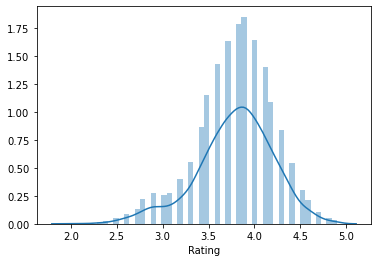

In [51]:
sns.distplot(df['Rating'])
plt.show()

### Observations:
        since data is somewhat normally distributed, we can fill the NaN values with 'Mean'.

In [52]:
df['Rating'].fillna(df['Rating'].mean(),inplace=True)

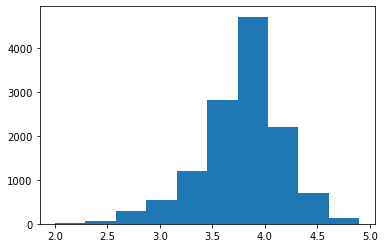

In [53]:
plt.hist(df['Rating'])
plt.show()

### Observations:
        Majority of Restaurants have 'Rating' of 3.5 to 4.5.

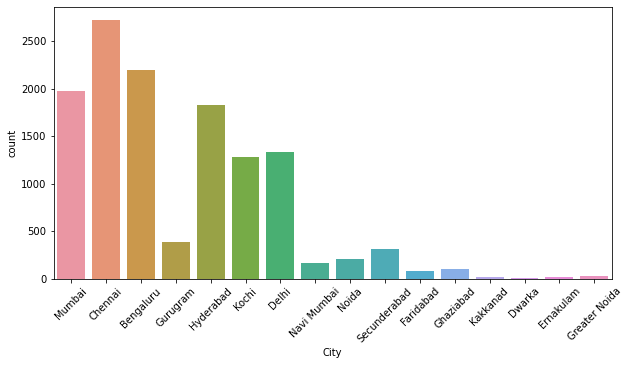

In [54]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.countplot(df['City'])
plt.show()

### Observations:
        Majority of Restaurants data are collected from Chennai, Bengaluru, Mumbai, Hyderabad cities.

In [55]:
Title.columns

Index(['CASUAL DINING', 'BAR', 'QUICK BITES', 'DESSERT PARLOR', 'CAFÉ',
       'MICROBREWERY', 'BEVERAGE SHOP', 'IRANI CAFE', 'BAKERY', 'None', 'PUB',
       'FINE DINING', 'SWEET SHOP', 'LOUNGE', 'FOOD COURT', 'FOOD TRUCK',
       'MESS', 'KIOSK', 'CLUB', 'CONFECTIONERY', 'DHABA', 'MEAT SHOP',
       'COCKTAIL BAR', 'PAAN SHOP'],
      dtype='object')

### Observations:
        These are the Titles of restaurants which can help identify what and for whom it is suitable for.

In [56]:
Cuisines.columns

Index(['Malwani', ' Goan', ' North Indian', 'Asian', ' Modern Indian',
       ' Japanese', 'North Indian', ' Chinese', ' Biryani', ' Hyderabadi',
       ...
       'Irish', 'Multi Cuisine', ' Jewish', ' Vegan', ' Oriental', ' Assamese',
       ' Modern Australian', 'Roast Chicken', 'Singaporean', 'Egyptian'],
      dtype='object', length=220)

### Observations:
        These are the various 'Cuisines' offered by different Restaurants.

## Bivariate Analysis

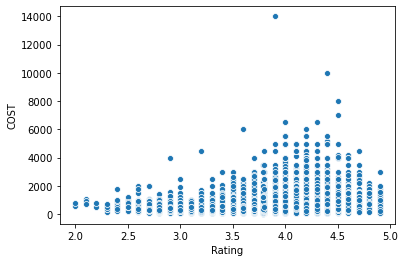

In [57]:
sns.scatterplot(df['Rating'],df['COST'])
plt.show()

### Observations:
        The average cost of a two-person meal is higher in Restaurants where it's 'Rating' is high. 

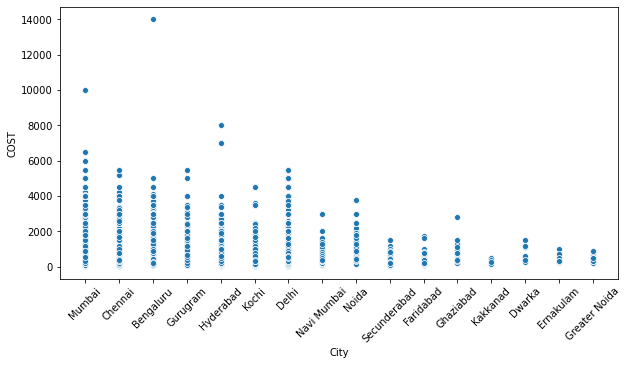

In [58]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.scatterplot(df['City'],df['COST'])
plt.show()

### Observations:
        The average cost of a two-person meal is higher in cities of Mumbai, Delhi, Gurugram, Hyderbad.

In [59]:
# dropping columns
df.drop(['TIME','LOCALITY','City'],axis=1,inplace=True)

In [60]:
df = pd.concat([df,Title,Cuisines,city],axis=1)

In [61]:
df

,COST,Rating,CASUAL DINING,BAR,QUICK BITES,DESSERT PARLOR,CAFÉ,MICROBREWERY,BEVERAGE SHOP,IRANI CAFE,...,Ghaziabad,Greater Noida,Gurugram,Hyderabad,Kakkanad,Kochi,Mumbai,Navi Mumbai,Noida,Secunderabad
0,1200,3.6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,1500,4.2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,800,3.8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,800,4.1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,300,3.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,500,3.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
12686,1800,4.3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
12687,1300,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
12688,400,3.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


## Checking Outliers

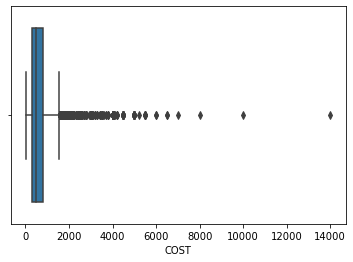

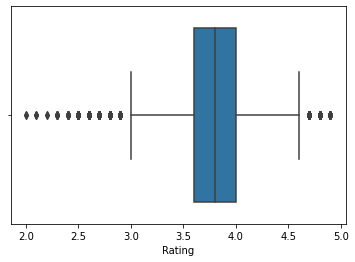

In [62]:
for i in ['COST','Rating']:
    sns.boxplot(df[i])
    plt.show()

### Observations:
        From above boxplots it is evident that outliers exists.

## Removing Outliers

### 1. Z-score Method

In [63]:
from scipy.stats import zscore

z=np.abs(zscore(df))

In [64]:
np.where(z>3)

(array([    0,     0,     1, ..., 12657, 12658, 12658], dtype=int64),
 array([ 26,  27,   3, ..., 259,  73,  85], dtype=int64))

In [65]:
# Threshold = 3
rd = df[(z<3).all(axis=1)]

In [66]:
print(df.shape,'\t\t',rd.shape)

(12660, 262) 		 (722, 262)


### Since it removed significant amount of data, we are not going with Z-score method of removing outliers.

## Checking Skewness

In [67]:
df.skew()

COST             3.977979
Rating          -0.536765
CASUAL DINING    0.651725
BAR              3.952681
QUICK BITES      0.571857
                   ...   
Kochi            2.652430
Mumbai           1.892961
Navi Mumbai      8.588245
Noida            7.551852
Secunderabad     6.154087
Length: 262, dtype: float64

### Observations:
        Acceptable range of skewness is +\- 0.6, hence data is skewed. 

## Splitting Data

In [68]:
x=df.drop('COST',axis=1)
y=df['COST']

In [69]:
print(x.shape,'\t\t',y.shape)

(12660, 261) 		 (12660,)


## Removing Skewness

In [70]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

## Standardizing Data

In [71]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(x)

# Model Training And Testing

In [72]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [74]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import GammaRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
mod_list=[Lasso(),Ridge(),ElasticNet(),GammaRegressor(),SGDRegressor(),LinearRegression(),
          DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),
          AdaBoostRegressor(),GradientBoostingRegressor()]

In [76]:
for mod in mod_list:
    print(mod)
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    r2=r2_score(y_pred,y_test)
    print('r2_score',r2*100)
    cv_score=cross_val_score(mod,x,y,cv=2).mean()
    print('cross_val_score:',cv_score*100)
    print('Training score:',mod.score(x_train,y_train)*100)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_pred,y_test))
    print('Mean squared error:',mean_squared_error(y_pred,y_test))
    print('Root mean squared error:',np.sqrt(mean_squared_error(y_pred,y_test)))
    print('*****************************************************************************************')

Lasso()
r2_score 62.0878965875203
cross_val_score: 69.87334803842027
Training score: 71.22286199199557
Error:
Mean absolute error: 193.49235831549103
Mean squared error: 108962.50426994216
Root mean squared error: 330.09468985420256
*****************************************************************************************
Ridge()
r2_score 62.46932465674458
cross_val_score: 69.61937216326197
Training score: 71.28213878021215
Error:
Mean absolute error: 195.03179405042354
Mean squared error: 109654.71973427295
Root mean squared error: 331.1415403332432
*****************************************************************************************
ElasticNet()
r2_score 28.51879554245922
cross_val_score: 66.627499006893
Training score: 67.01142113765034
Error:
Mean absolute error: 202.018123043312
Mean squared error: 127312.48304757744
Root mean squared error: 356.808748558072
*****************************************************************************************
GammaRegressor()
r2_score -53.3

### Observations:
        - From above it is evident that Random Forest Regressor is performing better.      

### Let's perform hyper-parameter tuning on Random Forest Regressor model.

In [77]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
r2=r2_score(y_pred,y_test)
print('r2_score',r2*100)
cv_score=cross_val_score(rfr,x,y,cv=2).mean()
print('cross_val_score:',cv_score*100)
print('Training score:',rfr.score(x_train,y_train)*100)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_pred,y_test))
print('Mean squared error:',mean_squared_error(y_pred,y_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_pred,y_test)))

r2_score 65.02556261519472
cross_val_score: 69.0897604417984
Training score: 94.73265469881031
Error:
Mean absolute error: 188.23800767108023
Mean squared error: 113838.01795720689
Root mean squared error: 337.3989003497298


## Hyper-parameter Tuning

In [78]:
from sklearn.model_selection import GridSearchCV

parameters = {
#     'criterion':['mse','mae'],
    'max_features':['auto','sqrt','log2'],
    'oob_score':[True,False],
    'warm_start':[True,False]
}

In [79]:
gscv=GridSearchCV(rfr,parameters,scoring='r2',cv=2)
gscv.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'oob_score': [True, False],
                         'warm_start': [True, False]},
             scoring='r2')

In [80]:
gscv.best_params_

{'max_features': 'sqrt', 'oob_score': True, 'warm_start': False}

In [81]:
rfr=RandomForestRegressor(max_features='sqrt',oob_score=True,warm_start=False)
rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)
r2=r2_score(y_pred,y_test)
print('r2_score',r2*100)
cv_score=cross_val_score(rfr,x,y,cv=2).mean()
print('cross_val_score:',cv_score*100)
print('Training score:',rfr.score(x_train,y_train)*100)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_pred,y_test))
print('Mean squared error:',mean_squared_error(y_pred,y_test))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_pred,y_test)))

r2_score 62.73975311849234
cross_val_score: 71.5562091273726
Training score: 94.84508640404067
Error:
Mean absolute error: 183.3729749525766
Mean squared error: 104831.6589284959
Root mean squared error: 323.7771748108503


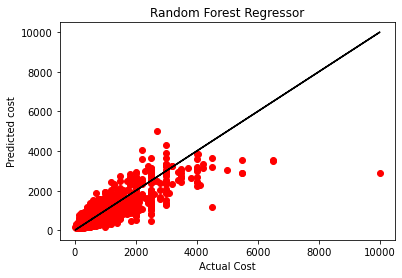

In [82]:
plt.scatter(y_test,y_pred,color='r')
plt.plot(y_test,y_test,color='k')
plt.title('Random Forest Regressor')
plt.xlabel('Actual Cost')
plt.ylabel('Predicted cost')
plt.show()

In [83]:
import joblib

In [85]:
# saving the best model for production
joblib.dump(rfr,'Restaurant_Food_Cost_Model.obj')

['Restaurant_Food_Cost_Model.obj']

## Let's Consider Test Dataset

In [86]:
td

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


### Observations:
        Features such as RESTAURANT_ID, VOTES are not required for 'COST' prediction, hence we can drop these columns.

In [87]:
td.drop(['RESTAURANT_ID','VOTES'],axis=1,inplace=True)

In [88]:
td.shape

(4231, 6)

In [89]:
td.columns

Index(['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING'], dtype='object')

In [90]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TITLE     4231 non-null   object
 1   CUISINES  4231 non-null   object
 2   TIME      4231 non-null   object
 3   CITY      4196 non-null   object
 4   LOCALITY  4201 non-null   object
 5   RATING    4229 non-null   object
dtypes: object(6)
memory usage: 198.5+ KB


### Observations:
        - All columns are in 'object' Data-Type

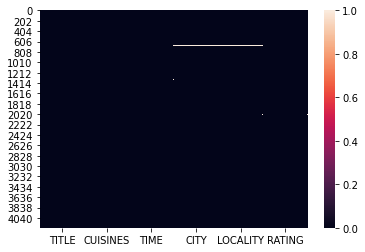

In [91]:
sns.heatmap(td.isnull())
plt.show()

In [92]:
td.isnull().sum()

TITLE        0
CUISINES     0
TIME         0
CITY        35
LOCALITY    30
RATING       2
dtype: int64

### Observations:
      CITY, LOCALITY, RATING columns have missing values.

## Handling The NaN Values

### Observations:
        - Since CITY, LOCALITY columns have 'Categorical values', we can fill the NaN values in these columns with 'most frequently repeated values'(Mode values).
        - Since RATING column has only 2 NaN values, we can drop those NaN values.

In [93]:
td['CITY'].fillna(td['CITY'].mode()[0],inplace=True)

In [94]:
td['LOCALITY'].fillna(td['LOCALITY'].mode()[0],inplace=True)

In [95]:
td.dropna(inplace=True)

In [96]:
# checking any duplicate data
td.duplicated().sum()

6

In [97]:
# deleting duplicates
td=td.drop_duplicates()

# Data Cleaning

## Converting 'TITLE Column' into 'Dummies Format'.

In [98]:
title=[]

for row in td['TITLE']:
    title.append(row.split(','))
    
td['TITLE']=title

In [99]:
td_Title=td['TITLE'].apply(lambda x : pd.Series(1 , x))

In [100]:
td_Title=td_Title.replace(np.NaN,0)

In [101]:
td_Title.head()

,CASUAL DINING,QUICK BITES,None,FOOD TRUCK,DESSERT PARLOR,BAR,LOUNGE,BEVERAGE SHOP,PUB,CAFÉ,...,FOOD COURT,KIOSK,MESS,MICROBREWERY,CLUB,COCKTAIL BAR,MEAT SHOP,CONFECTIONERY,PAAN SHOP,BHOJANALYA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
print(td_Title.shape,'\t\t',Title.shape)

(4223, 25) 		 (12660, 24)


In [103]:
# Training Dataset
Title.columns

Index(['CASUAL DINING', 'BAR', 'QUICK BITES', 'DESSERT PARLOR', 'CAFÉ',
       'MICROBREWERY', 'BEVERAGE SHOP', 'IRANI CAFE', 'BAKERY', 'None', 'PUB',
       'FINE DINING', 'SWEET SHOP', 'LOUNGE', 'FOOD COURT', 'FOOD TRUCK',
       'MESS', 'KIOSK', 'CLUB', 'CONFECTIONERY', 'DHABA', 'MEAT SHOP',
       'COCKTAIL BAR', 'PAAN SHOP'],
      dtype='object')

In [104]:
# Test Dataset
td_Title.columns

Index(['CASUAL DINING', 'QUICK BITES', 'None', 'FOOD TRUCK', 'DESSERT PARLOR',
       'BAR', 'LOUNGE', 'BEVERAGE SHOP', 'PUB', 'CAFÉ', 'BAKERY', 'SWEET SHOP',
       'DHABA', 'FINE DINING', 'IRANI CAFE', 'FOOD COURT', 'KIOSK', 'MESS',
       'MICROBREWERY', 'CLUB', 'COCKTAIL BAR', 'MEAT SHOP', 'CONFECTIONERY',
       'PAAN SHOP', 'BHOJANALYA'],
      dtype='object')

In [105]:
for col in td_Title.columns:
    if col in Title.columns:
        continue
    else:
        print(col)

BHOJANALYA


In [106]:
td_Title.drop('BHOJANALYA',axis=1,inplace=True)

In [107]:
for col in Title.columns:
    if col in td_Title.columns:
        continue
    else:
        print(col)

In [108]:
print(td_Title.shape,'\t\t',Title.shape)

(4223, 24) 		 (12660, 24)


### Since we extracted relevant information from 'TITLE' column, we can therefore drop this column.

In [109]:
td.drop('TITLE',axis=1,inplace=True)

## Converting 'CUISINES Column' into 'Dummies Format'.

In [110]:
cuisines=[]

for row in td['CUISINES']:
    cuisines.append(row.split(','))
    
td['CUISINES']=cuisines

In [111]:
td_Cuisines = td['CUISINES'].apply(lambda x : pd.Series(1 , x))

In [112]:
td_Cuisines=td_Cuisines.replace(np.NaN,0)

In [113]:
td_Cuisines.head()

,North Indian,Chinese,Mughlai,Kebab,South Indian,Fast Food,Pizza,North Indian,Seafood,Biryani,...,Naga,Vietnamese,Singaporean,Kashmiri,Vegan,Oriental,Drinks Only,Malaysian,Kashmiri,Sindhi
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
print(td_Cuisines.shape,'\t\t,',Cuisines.shape)

(4223, 188) 		, (12660, 220)


In [115]:
# Training Dataset
Cuisines.columns

Index(['Malwani', ' Goan', ' North Indian', 'Asian', ' Modern Indian',
       ' Japanese', 'North Indian', ' Chinese', ' Biryani', ' Hyderabadi',
       ...
       'Irish', 'Multi Cuisine', ' Jewish', ' Vegan', ' Oriental', ' Assamese',
       ' Modern Australian', 'Roast Chicken', 'Singaporean', 'Egyptian'],
      dtype='object', length=220)

In [116]:
# Test Dataset
td_Cuisines.columns

Index(['North Indian', ' Chinese', ' Mughlai', ' Kebab', 'South Indian',
       ' Fast Food', ' Pizza', ' North Indian', ' Seafood', ' Biryani',
       ...
       ' Naga', 'Vietnamese', ' Singaporean', ' Kashmiri', ' Vegan',
       ' Oriental', 'Drinks Only', 'Malaysian', 'Kashmiri', 'Sindhi'],
      dtype='object', length=188)

In [117]:
cols1=[]

for col in td_Cuisines.columns:
    if col in Cuisines.columns:
        continue
    else:
        cols1.append(col)

In [118]:
cols1

[' African',
 ' Egyptian',
 ' Fish and Chips',
 'Brazilian',
 ' South American',
 ' Mishti',
 ' Falafel',
 'Cantonese',
 ' Hawaiian']

In [119]:
td_Cuisines.drop(cols1,axis=1,inplace=True)

In [120]:
cols2=[]

for col in Cuisines.columns:
    if col in td_Cuisines.columns:
        continue
    else:
        cols2.append(col)

In [121]:
cols2

[' North Eastern',
 ' Coffee and Tea',
 'Bihari',
 'Portuguese',
 'Ethiopian',
 'Russian',
 'Wraps',
 'Naga',
 ' German',
 ' Cantonese',
 ' Hot Pot',
 ' Pan Asian',
 ' Satay',
 ' Dumplings',
 'Sri Lankan',
 'Tex-Mex',
 ' Belgian',
 'Afghan',
 'Konkan',
 'Bubble Tea',
 'Hot dogs',
 ' Paan',
 ' Poké',
 ' Sindhi',
 'Cafe Food',
 'Bohri',
 ' Fusion',
 'Armenian',
 ' Russian',
 'South American',
 'Charcoal Chicken',
 'Tamil',
 ' Peruvian',
 'Pakistani',
 'Irish',
 'Multi Cuisine',
 ' Jewish',
 ' Assamese',
 ' Modern Australian',
 'Roast Chicken',
 'Egyptian']

In [122]:
for i in cols2:
    td_Cuisines[i]=np.zeros([4223,1])

In [123]:
print(td_Cuisines.shape,'\t\t,',Cuisines.shape)

(4223, 220) 		, (12660, 220)


### Since we extracted relevant information from 'CUISINES' column, we can therefore drop this column.

In [124]:
td.drop('CUISINES',axis=1,inplace=True)

In [125]:
td

,TIME,CITY,LOCALITY,RATING
0,12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3
1,7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2
2,11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8
3,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8
4,11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6
...,...,...,...,...
4226,11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9
4227,11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3
4228,9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7
4229,"11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-


In [126]:
td['CITY'].unique()

array(['Noida', 'Mumbai', 'Faridabad', 'Kochi', 'Hyderabad',
       'Navi Mumbai', 'Chennai', 'New Delhi', 'Bangalore', 'Vasai Mumbai',
       'Gurgaon', 'Palarivattom', 'Delhi', 'Ernakulam', 'Thane West',
       'Ghaziabad', 'Chennai.', 'Thane', 'Telangana', 'Bandra West',
       'Potheri', 'Panathur Main Road', 'Secunderabad', 'JP Nagar',
       'Near Andheri West Station',
       'opposite to western side of ITPL Service gate', 'Kalkaji',
       'Bengaluru', 'APR Chambers', 'Tamil Nadu 600102', 'Andheri West',
       'India', 'Serilingampally', 'Maharashtra.', 'Gandhinagar Rd',
       'Near Andheri East Station', 'HSR Layout', 'Greater Noida',
       'Uttar Pradesh', 'Dwarka', 'Velachery', 'Anna Nagar West',
       'Indiranagar', 'Whitefield', 'Kochi Ravipuram', 'Kerala 682036',
       'Madhapur', 'Hyderabad.', 'Mira Road Thane Mumbai',
       'India Gate New Delhi', 'Bangalore - 560095', '1st Stage',
       'Sholinganallur. Chennai', 'Chennai (Above Bombay Brasserie)',
       'Powa

### Observations:
        - CITY column has lots of unique values.
        - Some values such as 'Bangalore','Bengaluru','New Delhi','Delhi NCR' are same, hence we can combine these values into one value.

In [127]:
for i in ['Bangalore','Banglore','Marathahalli','Bengaluru.']:
    td['CITY']=td['CITY'].str.replace(i,'Bengaluru')

In [128]:
for i in ['Chennai.','Chennai37']:
    td['CITY']=td['CITY'].str.replace(i,'Chennai')

In [129]:
td['CITY']=td['CITY'].str.replace('Hyderabad.','Hyderabad')

In [130]:
for i in ['Thane','Bandra West','Thane West','Andheri West','Mumbai West','Mumbai.','Near MumbaiStation']:
    td['CITY']=td['CITY'].str.replace(i,'Mumbai')

In [131]:
for i in ['New Delhi','Delhi NCR','Delh.']:
    td['CITY']=td['CITY'].str.replace(i,'Delhi')

In [132]:
for i in ['Kochi Ravipuram','kochi']:
    td['CITY']=td['CITY'].str.replace(i,'Kochi')

In [133]:
td['CITY']=td['CITY'].str.replace('Gurgaon','Gurugram')

In [134]:
td['CITY'].unique()

array(['Noida', 'Mumbai', 'Faridabad', 'Kochi', 'Hyderabad',
       'Navi Mumbai', 'Chennai', 'Delhi', 'Bengaluru', 'Vasai Mumbai',
       'Gurugram', 'Palarivattom', 'Ernakulam', 'Ghaziabad', 'Telangana',
       'Potheri', 'Panathur Main Road', 'Secunderabad', 'JP Nagar',
       'opposite to western side of ITPL Service gate', 'Kalkaji',
       'APR Chambers', 'Tamil Nadu 600102', 'India', 'Serilingampally',
       'Maharashtra.', 'Gandhinagar Rd', 'Near Andheri East Station',
       'HSR Layout', 'Greater Noida', 'Uttar Pradesh', 'Dwarka',
       'Velachery', 'Anna Nagar West', 'Indiranagar', 'Whitefield',
       'Kerala 682036', 'Madhapur', 'Mira Road MumbaiMumbai',
       'India Gate Delhi', 'Bengaluru- 560095', '1st Stage',
       'Sholinganallur. Chennai', 'Chennai(Above Bombay Brasserie)',
       'Powai', 'Kaloor', '682024', 'Tripunithura', 'Kakkanad', 'Girgaum',
       'Greater Kailash 1 (GK 1) Delhi', 'Kurla (W)', 'Secunderabad.',
       'Mumbai400015', 'MumbaiMumbai', 'Banjar

### Instead of keeping all these Cities, Let's consider 'Top 16' most frequently repeated cities.

In [135]:
td['CITY'].value_counts()[:16]

Bengaluru        747
Chennai          684
Mumbai           668
Hyderabad        642
Kochi            471
Delhi            440
Gurugram         147
Secunderabad      86
Noida             63
Navi Mumbai       58
Ghaziabad         30
Faridabad         29
India              8
Greater Noida      7
Dwarka             5
Kakkanad           5
Name: CITY, dtype: int64

In [136]:
City_list=list(td['CITY'].value_counts()[:16].keys())
City_list

['Bengaluru',
 'Chennai',
 'Mumbai',
 'Hyderabad',
 'Kochi',
 'Delhi',
 'Gurugram',
 'Secunderabad',
 'Noida',
 'Navi Mumbai',
 'Ghaziabad',
 'Faridabad',
 'India',
 'Greater Noida',
 'Dwarka',
 'Kakkanad']

In [137]:
c=[]

for i in td['CITY']:
    if i in City_list:
        c.append(i)
    else:
        c.append(np.NaN)   

In [138]:
td['City']=c

In [139]:
td['City'].isnull().sum()

133

### Filling these NaN values with 'most frequently repeated value'.

In [140]:
td['City'].fillna(td['City'].mode()[0],inplace=True)

## Converting 'City Column' into 'Dummies Format'.

In [141]:
td_city=td['City']
td_city=pd.get_dummies(td_city)
td_city.head()

,Bengaluru,Chennai,Delhi,Dwarka,Faridabad,Ghaziabad,Greater Noida,Gurugram,Hyderabad,India,Kakkanad,Kochi,Mumbai,Navi Mumbai,Noida,Secunderabad
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [142]:
print(city.shape,'\t\t',td_city.shape)

(12660, 16) 		 (4223, 16)


In [143]:
# Training Dataset
city.columns

Index(['Bengaluru', 'Chennai', 'Delhi', 'Dwarka', 'Ernakulam', 'Faridabad',
       'Ghaziabad', 'Greater Noida', 'Gurugram', 'Hyderabad', 'Kakkanad',
       'Kochi', 'Mumbai', 'Navi Mumbai', 'Noida', 'Secunderabad'],
      dtype='object')

In [144]:
# Test Dataset
td_city.columns

Index(['Bengaluru', 'Chennai', 'Delhi', 'Dwarka', 'Faridabad', 'Ghaziabad',
       'Greater Noida', 'Gurugram', 'Hyderabad', 'India', 'Kakkanad', 'Kochi',
       'Mumbai', 'Navi Mumbai', 'Noida', 'Secunderabad'],
      dtype='object')

In [145]:
for col in td_city.columns:
    if col in city.columns:
        continue
    else:
        print(col)

India


In [146]:
td_city.drop('India',axis=1,inplace=True)

In [147]:
for col in city.columns:
    if col in td_city.columns:
        continue
    else:
        print(col)

Ernakulam


In [148]:
td_city['Ernakulam']=np.zeros([4223,1])

In [149]:
print(city.shape,'\t\t',td_city.shape)

(12660, 16) 		 (4223, 16)


### Since we extracted relevant information from CITY column, we can therefore drop this column.

In [150]:
td.drop('CITY',axis=1,inplace=True)

In [151]:
td.head()

,TIME,LOCALITY,RATING,City
0,12noon – 12midnight (Mon-Sun),Sector 18,4.3,Noida
1,7am – 12:30AM (Mon-Sun),Grant Road,4.2,Mumbai
2,11am – 11:30pm (Mon-Sun),Marine Lines,3.8,Mumbai
3,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",NIT,3.8,Faridabad
4,11am – 10pm (Mon-Sun),Kaloor,3.6,Kochi


# EDA

## Univariate Analysis

In [152]:
td['RATING'].unique()

array(['4.3', '4.2', '3.8', '3.6', '3.7', 'NEW', '4.0', '3.4', '3.2',
       '4.1', '3.0', '-', '3.5', '4.5', '3.9', '3.3', '2.9', '3.1', '2.5',
       '2.8', '4.6', '4.4', '2.7', '4.8', '2.6', '4.9', '2.1', '4.7',
       '2.3', '2.4', '2.2'], dtype=object)

In [153]:
R=[]

for rating in td['RATING']:
    if rating == '-':
        R.append(np.NaN)
    elif rating == 'NEW':
        R.append(np.NaN)
    else:
        R.append(rating)

In [154]:
td['Rating']=R
td['Rating']=td['Rating'].astype(float)

In [155]:
td.drop('RATING',axis=1,inplace=True)

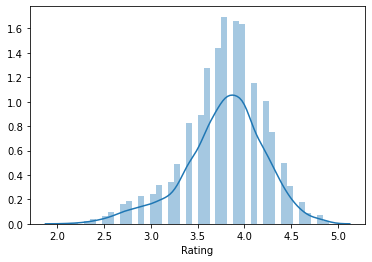

In [156]:
sns.distplot(td['Rating'])
plt.show()

### Observations:
        since data is somewhat normally distributed, we can fill the NaN values with 'Mean'.

In [157]:
td['Rating'].fillna(td['Rating'].mean(),inplace=True)

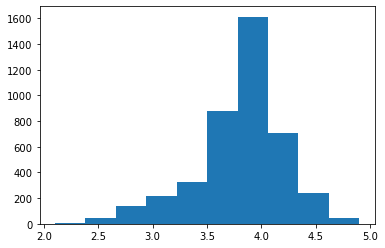

In [158]:
plt.hist(td['Rating'])
plt.show()

### Observations:
        Majority of Restaurants have 'Rating' of 3.5 to 4.5.

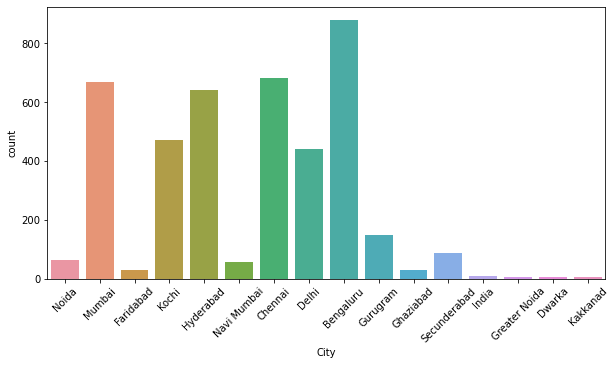

In [159]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.countplot(td['City'])
plt.show()

### Observations:
        Majority of Restaurants data are collected from Bengaluru, Chennai, Mumbai, Hyderabad cities.

In [160]:
td_Title.columns

Index(['CASUAL DINING', 'QUICK BITES', 'None', 'FOOD TRUCK', 'DESSERT PARLOR',
       'BAR', 'LOUNGE', 'BEVERAGE SHOP', 'PUB', 'CAFÉ', 'BAKERY', 'SWEET SHOP',
       'DHABA', 'FINE DINING', 'IRANI CAFE', 'FOOD COURT', 'KIOSK', 'MESS',
       'MICROBREWERY', 'CLUB', 'COCKTAIL BAR', 'MEAT SHOP', 'CONFECTIONERY',
       'PAAN SHOP'],
      dtype='object')

### Observations:
        These are the Titles of restaurants which can help identify what and for whom it is suitable for.

In [161]:
td_Cuisines.columns

Index(['North Indian', ' Chinese', ' Mughlai', ' Kebab', 'South Indian',
       ' Fast Food', ' Pizza', ' North Indian', ' Seafood', ' Biryani',
       ...
       'Tamil', ' Peruvian', 'Pakistani', 'Irish', 'Multi Cuisine', ' Jewish',
       ' Assamese', ' Modern Australian', 'Roast Chicken', 'Egyptian'],
      dtype='object', length=220)

### Observations:
        These are the various 'Cuisines' offered by different Restaurants.

In [162]:
# dropping columns
td.drop(['TIME','LOCALITY','City'],axis=1,inplace=True)

In [163]:
test = pd.concat([td,td_Title,td_Cuisines,td_city],axis=1)

In [164]:
test.shape

(4223, 261)

## Checking Outliers

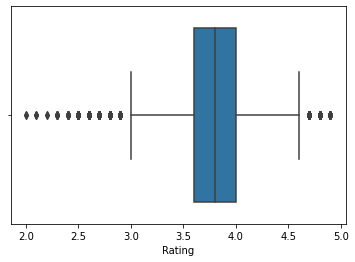

In [165]:
sns.boxplot(df['Rating'])
plt.show()

### Observations:
        From above boxplot it is evident that outliers exists.

## Removing Outliers

### 1. Z-score Method

In [166]:
z=np.abs(zscore(test))

In [167]:
# Threshold=3
rd = test[(z<3).all(axis=1)]

In [168]:
print(test.shape,'\t\t',rd.shape)

(4223, 261) 		 (0, 261)


### Since it removed all data, we are not going with Z-score method of removing outliers.

## Checking Skewness

In [169]:
test.skew()

Rating           -0.597626
CASUAL DINING     0.621621
QUICK BITES       0.561448
None              3.464479
FOOD TRUCK       22.918333
                   ...    
Mumbai            1.874101
Navi Mumbai       8.359061
Noida             8.005774
Secunderabad      6.793985
Ernakulam         0.000000
Length: 261, dtype: float64

### Observations:
        Acceptable range of skewness is +\- 0.6, hence data is skewed. 

## Removing Skewness & Standardizing Data

In [170]:
test=power_transform(test,method='yeo-johnson')


sc=StandardScaler()
test=sc.fit_transform(test)

# Loading Model

In [171]:
rfr = joblib.load('Restaurant_Food_Cost_Model.obj')

## Predicting Cost

In [172]:
cost = rfr.predict(test)

In [173]:
fc = pd.DataFrame({'COST':cost})
fc

,COST
0,1180.500000
1,703.366667
2,491.472917
3,319.420238
4,299.566667
...,...
4218,867.000000
4219,585.166667
4220,404.883333
4221,439.402273


In [174]:
# saving the predicted Food_Cost in a csv file.
fc.to_csv('Food_Cost.csv')